# Predicting Time Series Forecast - Fast Food Sales
# Using Idexes

In [32]:
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

### Importing data from Excel file. The data contains the monthly sale from 2014 to October 2017

In [33]:
df = pd.read_excel('Faturamento+indices.xlsx')
df.head()

,Data,Vendas,IPCA,SELIC,INPC,INCC,IGPM
0,2017-10-01,132573,0.42,0.6640,0.37,0.19,0.20
1,2017-09-01,140939,0.16,0.6470,-0.02,0.14,0.47
2,2017-08-01,124636,0.19,0.7542,-0.03,0.40,0.10
3,2017-07-01,141766,0.24,0.8196,0.17,0.22,-0.72
4,2017-06-01,137397,-0.23,0.8053,-0.30,1.36,-0.67


### Transforming the "Data" column to Index

In [34]:
df.index = df['Data']
df.drop('Data', axis=1 , inplace=True)

In [35]:
df.head()

,Vendas,IPCA,SELIC,INPC,INCC,IGPM
Data,,,,,,
2017-10-01,132573,0.42,0.6640,0.37,0.19,0.20
2017-09-01,140939,0.16,0.6470,-0.02,0.14,0.47
2017-08-01,124636,0.19,0.7542,-0.03,0.40,0.10
2017-07-01,141766,0.24,0.8196,0.17,0.22,-0.72
2017-06-01,137397,-0.23,0.8053,-0.30,1.36,-0.67


<function matplotlib.pyplot.show>

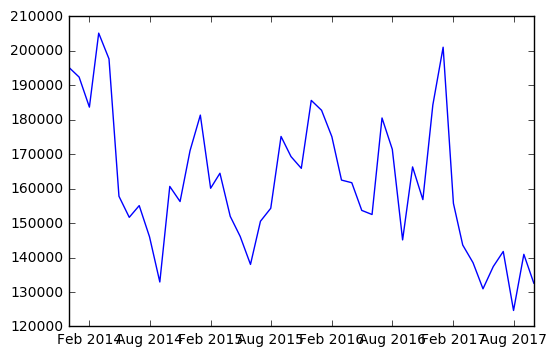

In [36]:
t = df.index.values
x = df.iloc[:,0]
pl.plot(x)
pl.show

### Creating the Output column (dependent column) for tranning data set, wich will be the "Vendas" shiftted by 1. It means the predicted sales to a month will be the sales of next month.


In [37]:
df['out'] = df['Vendas'].shift(1)
df.head()

,Vendas,IPCA,SELIC,INPC,INCC,IGPM,out
Data,,,,,,,
2017-10-01,132573,0.42,0.6640,0.37,0.19,0.20,NaN
2017-09-01,140939,0.16,0.6470,-0.02,0.14,0.47,132573.0
2017-08-01,124636,0.19,0.7542,-0.03,0.40,0.10,140939.0
2017-07-01,141766,0.24,0.8196,0.17,0.22,-0.72,124636.0
2017-06-01,137397,-0.23,0.8053,-0.30,1.36,-0.67,141766.0


In [38]:
df1=df.copy()
df1.dropna(axis=0 , inplace=True)
df1.head()

,Vendas,IPCA,SELIC,INPC,INCC,IGPM,out
Data,,,,,,,
2017-09-01,140939,0.16,0.6470,-0.02,0.14,0.47,132573.0
2017-08-01,124636,0.19,0.7542,-0.03,0.40,0.10,140939.0
2017-07-01,141766,0.24,0.8196,0.17,0.22,-0.72,124636.0
2017-06-01,137397,-0.23,0.8053,-0.30,1.36,-0.67,141766.0
2017-05-01,130927,0.31,0.9096,0.36,0.13,-0.93,137397.0


### Normalizing the Data

In [39]:
df2 = (df1-df1.mean())/(df1.max() - df1.min())
df2.head()


,Vendas,IPCA,SELIC,INPC,INCC,IGPM,out
Data,,,,,,,
2017-09-01,-0.262614,-0.250631,-0.678833,-0.313236,-0.187848,0.017740,-0.349597
2017-08-01,-0.465090,-0.231276,-0.460459,-0.318761,-0.054515,-0.106006,-0.245694
2017-07-01,-0.252343,-0.199018,-0.327234,-0.208263,-0.146823,-0.380253,-0.448171
2017-06-01,-0.306604,-0.502244,-0.356364,-0.467932,0.437793,-0.363531,-0.235423
2017-05-01,-0.386959,-0.153857,-0.143897,-0.103291,-0.192977,-0.450487,-0.289685


## Linear Regression

### Multi Variable (sales shiftted by 1 for output)
### Spliting the data into train and test
### Using seed to reproduce the variable selection
### MSE as a metric

In [40]:
t = df2.index.values
x = df2.iloc[:,0:6]
y = df2.iloc[:,6]

In [41]:
seed=7
from sklearn import model_selection
x_train , x_test , y_train , y_test = model_selection.train_test_split(x,y,test_size=0.2, random_state=seed)

In [42]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [43]:
def rmse(y_real,y_pred):
    return np.sqrt(sum([ (m - n)**2 for m, n in zip(y_real,y_pred[:-1])]))/len(y_real)

In [44]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
mean_squared_error_train = rmse(y_train, regr.predict(x_train))
mean_squared_error_test = rmse(y_test, regr.predict(x_test))
print('Mean train squared error: %.5f' %  mean_squared_error_train)
print('Mean test squared error: %.5f' %  mean_squared_error_test)

Mean train squared error: 0.02462
Mean test squared error: 0.07105


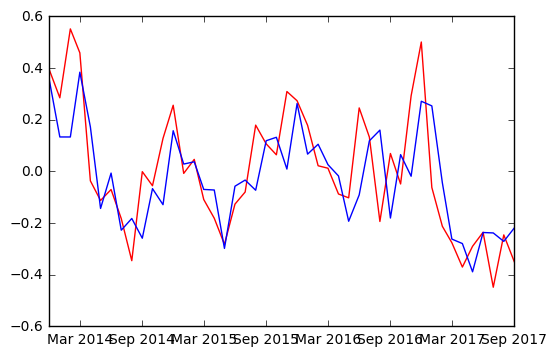

In [46]:
y_pred = regr.predict(x)
pl.plot(t,y,'r-')
pl.plot(t,y_pred)
pl.show()

### Creating the new input data to predict

In [49]:
p= df.iloc[0,0:6]
p

Vendas    132573.000
IPCA           0.420
SELIC          0.664
INPC           0.370
INCC           0.190
IGPM           0.200
Name: 2017-10-01 00:00:00, dtype: float64

In [51]:
p= df.iloc[0,0:6]
p= (p-df1.iloc[:,0:6].mean())/(df1.iloc[:,0:6].max() - df1.iloc[:,0:6].min())
p= p.reshape(1,-1)
p

array([[-0.36651594, -0.0828892 , -0.64420275, -0.09776603, -0.16220736,
        -0.07256071]])

In [52]:
prev = regr.predict(p)

### Result (prediction for next month)

In [53]:
prev = (prev*(df1["out"].max() - df1["out"].min()))+df1["out"].mean()
prev

array([ 132497.98000734])